<a href="https://colab.research.google.com/github/DIPANJAN001/Forecasting-Solar-Energy/blob/master/pv_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install Boruta
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import concatenate
from keras import Model
from keras.layers import Input
from keras.layers import Bidirectional
from keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input
from sklearn.decomposition import PCA 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
def lstm_data_transform(x_data, y_data, num_steps):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [38]:
df=pd.read_excel("/content/pv_06.xlsx")
weather_input1=df.drop('power_normed',axis=1)
weather_input=weather_input1.drop('time_idx',axis=1)
solpow=df['power_normed']

In [39]:
rfc = RandomForestRegressor(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(weather_input), np.array(solpow)) 

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	10
Tentative: 	7
Rejected: 	32
Iteration: 	9 / 100
Confirmed: 	10
Tentative: 	7
Rejected: 	32
Iteration: 	10 / 100
Confirmed: 	10
Tentative: 	7
Rejected: 	32
Iteration: 	11 / 100
Confirmed: 	10
Tentative: 	7
Rejected: 	32
Iteration: 	12 / 100
Confirmed: 	10
Tentative: 	7
Rejected: 	32
Iteration: 	13 / 100
Confirmed: 	10
Tentative: 	6
Rejected: 	33
Iteration: 	14 / 100
Confirmed: 	10
Tentative: 	6
Rejected: 	33
Iteration: 	15 / 100
Confirmed: 	10
Tentative: 	6
Rejected: 	33
Iteration: 	16 / 100
Confirmed: 	10
Tentative: 	6
Reject

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=109,
                                         random_state=RandomState(MT19937) at 0x7F6C1A3C6640),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F6C1A3C6640, verbose=2)

In [40]:
X_important_train = boruta_selector.transform(np.array(weather_input))
num_steps = 2
# training set
(x_transformed_train,
 y_transformed_train) = lstm_data_transform(X_important_train,solpow , num_steps=num_steps)
assert x_transformed_train.shape[0] == y_transformed_train.shape[0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_transformed_train,y_transformed_train,test_size=0.33, random_state=42,shuffle=False)
#X_train_,X_val,y_train_,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=42,shuffle=False)
inputs1 = Input(shape=(X_train.shape[1],X_train.shape[2]))

In [41]:
inputs1

<KerasTensor: shape=(None, 2, 12) dtype=float32 (created by layer 'input_3')>

In [42]:
from keras import optimizers

In [43]:
opt=optimizers.Adam(learning_rate=0.001)

Epoch 1/200
42/42 [==============================] - 11s 48ms/step - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 2/200
42/42 [==============================] - 1s 23ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 3/200
42/42 [==============================] - 1s 23ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 4/200
42/42 [==============================] - 2s 41ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 5/200
42/42 [==============================] - 2s 49ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 6/200
42/42 [==============================] - 2s 44ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 7/200
42/42 [==============================] - 2s 48ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 8/200
42/42 [==============================] - 2s 47ms/step - loss: 0

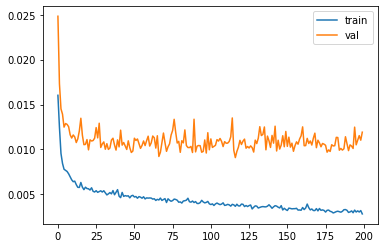

52/52 [==============================] - 1s 4ms/step


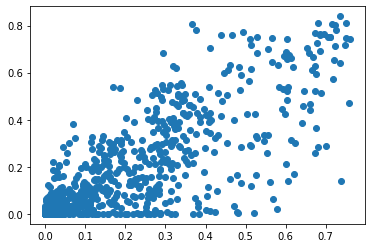

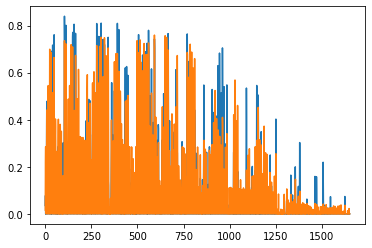

0.09363489105254554


In [44]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  #output = layers.average([ out1_1, out2_1, out3_1])
  merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))

Epoch 1/200
42/42 [==============================] - 11s 75ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 2/200
42/42 [==============================] - 2s 41ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 3/200
42/42 [==============================] - 1s 22ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 4/200
42/42 [==============================] - 1s 22ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 5/200
42/42 [==============================] - 1s 23ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 6/200
42/42 [==============================] - 1s 23ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 7/200
42/42 [==============================] - 1s 22ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 8/200
42/42 [==============================] - 1s 22ms/step - loss: 0

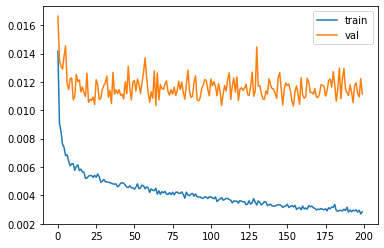

52/52 [==============================] - 1s 4ms/step


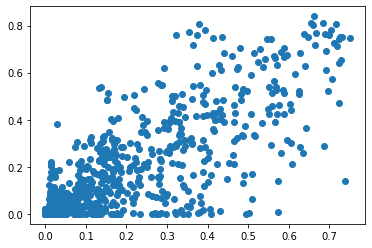

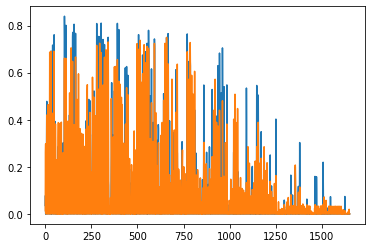

0.09230556174092615


In [45]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.5)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.5)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size =64 )
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))

In [46]:
from keras.layers import Bidirectional

Epoch 1/75
42/42 [==============================] - 22s 97ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 2/75
42/42 [==============================] - 2s 49ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0173 - val_mse: 0.0173
Epoch 3/75
42/42 [==============================] - 2s 48ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 4/75
42/42 [==============================] - 2s 48ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 5/75
42/42 [==============================] - 2s 49ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 6/75
42/42 [==============================] - 2s 49ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 7/75
42/42 [==============================] - 2s 49ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 8/75
42/42 [==============================] - 2s 48ms/step - loss: 0.0055 - 

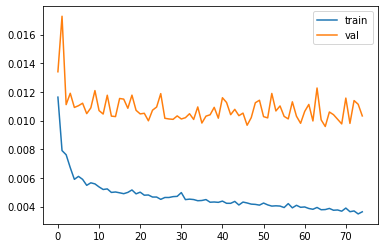

52/52 [==============================] - 2s 9ms/step


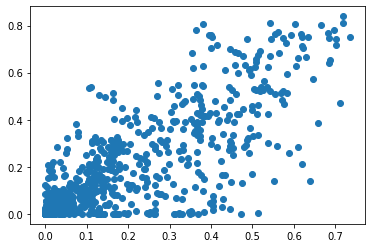

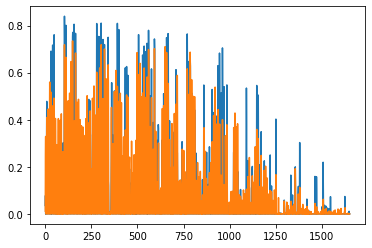

0.08991214883396056


In [47]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 75,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))

Epoch 1/75
42/42 [==============================] - 23s 96ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 2/75
42/42 [==============================] - 2s 50ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 3/75
42/42 [==============================] - 2s 49ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 4/75
42/42 [==============================] - 2s 48ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 5/75
42/42 [==============================] - 2s 48ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 6/75
42/42 [==============================] - 2s 50ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 7/75
42/42 [==============================] - 2s 48ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 8/75
42/42 [==============================] - 2s 48ms/step - loss: 0.0054 - 

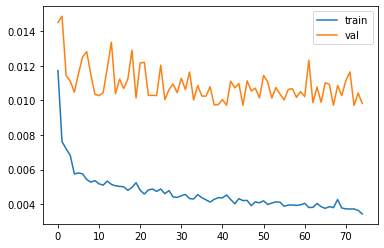

52/52 [==============================] - 2s 8ms/step


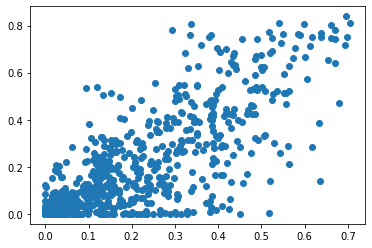

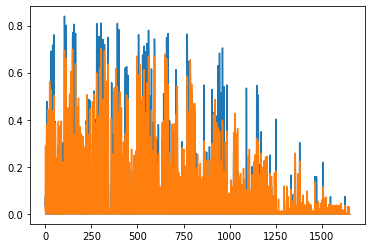

0.08948258390485098


In [48]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  #output = layers.average([ out1_1, out2_1, out3_1])
  merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 75,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))